In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os,sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import numpy as np
import pandas as pd
import seaborn as sn
import json
import glob, os
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from numpy.random import seed
from scipy.stats import kruskal

from termcolor import colored
import my_plots
from matplotlib.pylab import savefig

In [35]:
# plot settings

lw = 1.5

fs = 13

params = {
    'axes.labelsize': fs,
    'font.size': fs,
    'legend.fontsize': fs,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'text.usetex': False,
    'figure.figsize': [6, 3],
    'boxplot.boxprops.linewidth' : lw,
    'boxplot.whiskerprops.linewidth' : lw,
    'boxplot.capprops.linewidth' : lw,
    'boxplot.medianprops.linewidth' : lw,
#     'text.usetex' : True,
#     'font.family' : 'serif',

   }
mpl.rcParams.update(params)

# Plots for the haptics experiment

In [3]:
def dfFromJSON(file):
    with open(file) as f:
        temp = []
        for line in f:
            temp.append(json.loads(line))
            
    df = pd.io.json.json_normalize(temp[0]['allLogs'])
    df.columns = df.columns.map(lambda x: x.split("*.")[-1])
    return df

In [4]:
def appendToLogs(file, log, _type):
    df = dfFromJSON(file)
    log[_type].append(df)

In [5]:
path_to_folder =  "../Haptics_new/Haptics_X/"
subjects = glob.glob(path_to_folder + "*/")

logs = {}
for curr in subjects:
    logs[curr] = []
    
subjects.sort()
subjects

['../Haptics_new/Haptics_X/sub1_Controller copy/',
 '../Haptics_new/Haptics_X/sub1_Glove_haptics copy/',
 '../Haptics_new/Haptics_X/sub1_Glove_nohaptics copy/',
 '../Haptics_new/Haptics_X/sub2_Controller/',
 '../Haptics_new/Haptics_X/sub2_Glove_haptics/',
 '../Haptics_new/Haptics_X/sub2_Glove_nohaptics/',
 '../Haptics_new/Haptics_X/sub3_Controller/',
 '../Haptics_new/Haptics_X/sub3_Glove_haptics/',
 '../Haptics_new/Haptics_X/sub3_Glove_nohaptics/',
 '../Haptics_new/Haptics_X/sub4_Controller/',
 '../Haptics_new/Haptics_X/sub4_Glove_haptics/',
 '../Haptics_new/Haptics_X/sub4_Glove_nohaptics/',
 '../Haptics_new/Haptics_X/sub5_Controller/',
 '../Haptics_new/Haptics_X/sub5_Glove_haptics/',
 '../Haptics_new/Haptics_X/sub5_Glove_nohaptics/',
 '../Haptics_new/Haptics_X/sub6_Controller/',
 '../Haptics_new/Haptics_X/sub6_Glove_haptics/',
 '../Haptics_new/Haptics_X/sub6_Glove_nohaptics/',
 '../Haptics_new/Haptics_X/sub7_Controller copy/',
 '../Haptics_new/Haptics_X/sub7_Glove_haptics copy/',
 '..

In [6]:
# # used to remove outliers

# subjects.remove(subjects[5])
# subjects.remove(subjects[4])

# logs = {}
# for curr in subjects:
#     logs[curr] = []
    
# subjects

In [7]:
EXP_N_THOMAS = 4
EXP_N = 5

for subject in subjects:
    print(subject)
    files = glob.glob(subject+"*.json")
    files.sort()
    
    if len(files) != EXP_N and len(files) != EXP_N_THOMAS:
        print('wrong number of experiments!')
        break
    for file in files:
        logs[subject].append(dfFromJSON(file))

../Haptics_new/Haptics_X/sub1_Controller copy/
../Haptics_new/Haptics_X/sub1_Glove_haptics copy/
../Haptics_new/Haptics_X/sub1_Glove_nohaptics copy/
../Haptics_new/Haptics_X/sub2_Controller/
../Haptics_new/Haptics_X/sub2_Glove_haptics/
../Haptics_new/Haptics_X/sub2_Glove_nohaptics/
../Haptics_new/Haptics_X/sub3_Controller/
../Haptics_new/Haptics_X/sub3_Glove_haptics/
../Haptics_new/Haptics_X/sub3_Glove_nohaptics/
../Haptics_new/Haptics_X/sub4_Controller/
../Haptics_new/Haptics_X/sub4_Glove_haptics/
../Haptics_new/Haptics_X/sub4_Glove_nohaptics/
../Haptics_new/Haptics_X/sub5_Controller/
../Haptics_new/Haptics_X/sub5_Glove_haptics/
../Haptics_new/Haptics_X/sub5_Glove_nohaptics/
../Haptics_new/Haptics_X/sub6_Controller/
../Haptics_new/Haptics_X/sub6_Glove_haptics/
../Haptics_new/Haptics_X/sub6_Glove_nohaptics/
../Haptics_new/Haptics_X/sub7_Controller copy/
../Haptics_new/Haptics_X/sub7_Glove_haptics copy/
../Haptics_new/Haptics_X/sub7_Glove_nohaptics copy/
../Haptics_new/Haptics_X/sub8_Co

In [8]:
fields = ['first motion', 'last motion', 'first glove', 'last glove', 'first remote', 'last remote']
interfaces = ['motion', 'glove', 'remote']

sub_remote = [x for x in subjects if 'Controller' in x]
sub_motion = [x for x in subjects if 'Glove_haptics' in x]
sub_glove = [x for x in subjects if 'Glove_nohaptics' in x]

t = [logs[x] for x in sub_motion]
logs['motion'] = []
for i in t:
    for j in i:
        logs['motion'].append(j)

t = [logs[x] for x in sub_remote]
logs['remote'] = []
for i in t:
    for j in i:
        logs['remote'].append(j)

t = [logs[x] for x in sub_glove]
logs['glove'] = []
for i in t:
    for j in i:
        logs['glove'].append(j)

logs['first motion'] = [logs[x][0] for x in sub_motion]
logs['last motion'] = [logs[x][-1] for x in sub_motion]
logs['first remote'] = [logs[x][0] for x in sub_remote]
logs['last remote'] = [logs[x][-1] for x in sub_remote]
logs['first glove'] = [logs[x][0] for x in sub_glove]
logs['last glove'] = [logs[x][-1] for x in sub_glove]

In [9]:
def t_test_kruskal(X, Y):
    
    # Kruskal-Wallis H-test
    
    # seed the random number generator
    seed(1)
    
    # compare samples
    stat, p = kruskal(X, Y)
    
    return [stat, p]

def str_from_p(p):
    
    if p<0.01:
        add_str = ' !!!!!!!!!!'
    elif p<0.05:
        add_str = ' !!!!!!'
    elif p<0.1:
        add_str = ' !'
    else:
        add_str = ''
        
    return add_str

def print_p(p):
    
    col = None
    
    if p<0.01:
        col = 'green'
    elif p<0.05:
        col = 'yellow'
    elif p<0.1:
        col = 'red'
        
    if col is not None:
        print(colored('p = '+ str(p) + str_from_p(p), col))
    else:
        print('p = '+ str(p) + str_from_p(p))

def runBasicAnalysis(f):
    
    var = {}

    var['means'] = []
    var['stds'] = []

    for i in fields:
        var[i] = []
        for j in logs[i]:
            var[i].append(f(j))
        print(i)
        print(var[i])

        var['means'].append(np.mean(var[i]))
        var['stds'].append(np.std(var[i]))

        print('mean = ', var['means'][-1])
        print('std = ', var['stds'][-1])

        print()
        
            
    for idx,i in enumerate(fields):
        for j in fields[idx+1:]:
            if i != j:
                
                t, p = t_test_kruskal(var[i],var[j])
                
                print (i,j)
                print_p(p)
            
    var['diff mot'] = 1-np.array(var['last motion'])/np.array(var['first motion'])
    var['diff rem'] = 1-np.array(var['last remote'])/np.array(var['first remote'])

    print()
    print('motion ratio')
    print(var['diff mot'])
    print(np.mean(var['diff mot']))
    print(np.std(var['diff mot']))
    print()
    print('remote ratio')
    print(var['diff rem'])
    print(np.mean(var['diff rem']))
    print(np.std(var['diff rem']))

    t, p = t_test_kruskal(var['diff mot'], var['diff rem'])

    print()
    print('p = ', p, str_from_p(p))
            
    var['diff first'] = 1-np.array(var['first motion'])/np.array(var['first remote'])
    var['diff last'] = 1-np.array(var['last motion'])/np.array(var['last remote'])

    print()
    print('firts ratio')
    print(var['diff first'])
    print(np.mean(var['diff first']))
    print(np.std(var['diff first']))
    print()
    print('last ratio')
    print(var['diff last'])
    print(np.mean(var['diff last']))
    print(np.std(var['diff last']))

    t, p = t_test_kruskal(var['diff first'], var['diff last'])

    print()
    print('p = ', p, str_from_p(p))
            
    return var

def runHapticsAnalysis(f):
    
    var = {}

    var['means'] = []
    var['stds'] = []

    for i in interfaces:
        var[i] = []
        for j in logs[i]:
            var[i].append(f(j))
        print(i)
        print(var[i])

        var['means'].append(np.mean(var[i]))
        var['stds'].append(np.std(var[i]))

        print('mean = ', var['means'][-1])
        print('std = ', var['stds'][-1])

        print()
        
            
    for idx,i in enumerate(interfaces):
        for j in interfaces[idx+1:]:
            if i != j:
                
                t, p = t_test_kruskal(var[i],var[j])
                
                print(i, j)
                print_p(p)
                
    return var

def basic_plot(var):
    
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(131)
    ax.bar([0, 1, 2, 3],
       var['means'],
       yerr=var['stds'])

    plt.xticks(range(4), fields, rotation = 10)

    ax = fig.add_subplot(132)
    ax.bar([0, 1],
       [np.mean(var['diff mot']), np.mean(var['diff rem'])],
       yerr=[np.std(var['diff mot']), np.std(var['diff rem'])])
    
    plt.xticks(range(2), ['motion', 'remote'], rotation = 10)

    ax = fig.add_subplot(133)
    ax.bar([0, 1],
       [np.mean(var['diff first']), np.mean(var['diff last'])],
       yerr=[np.std(var['diff first']), np.std(var['diff last'])])
    
    plt.xticks(range(2), ['first', 'last'], rotation = 10)
    
def basic_box(data, names, col = 'b', leg = False, ax = None, save = False, where = None, y = '', xlim = None, ylim = None, xticks = None, yticks = None, whis = 1.5):

    
    c0 = np.array([0,0,0])/256
    c1 = np.array([150,0,0])/256
    c2 = np.array([0,0,100])/256
    c3 = np.array([0,100,0])/256

    col = [c0, c1, c2, c3]

    if ax is None:
        plt.figure()
        ax = plt.subplot(1, 1, 1)    
    
    my_plots.boxplot_elegant(ax, data[names[0]], [1], col[0], whis = whis)
    my_plots.boxplot_elegant(ax, data[names[1]], [1.4], col[1], whis = whis)
    
    plt.grid()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    if xticks is not None:
        plt.xticks(xticks)
    if yticks is not None:
        plt.yticks(yticks)
    
    plt.xticks([1, 1.4], ['Remote', 'Motion'])
    
    plt.ylabel(y)

    if leg:
        for idx,i in enumerate(labels):
            ax.scatter(0,0, color = c[idx], label = i)
        
        plt.legend()

    if save:
        savefig(where, bbox_inches='tight')
        
    return ax

In [10]:
def moving_average(data_set, periods=3, fill_with_zeros = True):
    
    if data_set.size < periods:
        return data_set
    
    if isinstance(data_set, pd.DataFrame):
        print('a')
        data_set.index = range(len(data_set))

    weights = np.ones(periods) / periods
    
    ma = np.convolve(data_set, weights, mode='valid')

    if fill_with_zeros:
        fill_before = np.ones(int(np.ceil((len(data_set) - len(ma))/2))) * data_set[0]
        fill_after = np.ones(int(np.floor((len(data_set) - len(ma))/2))) * data_set[-1]
        ma = np.hstack([fill_before, ma, fill_after])
    
    return ma

def filter_position(df, steps):
    
    l = moving_average(df['dronePosition.x'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.x'] = np.append([l[0]]*(steps-1), l)
    l = moving_average(df['dronePosition.y'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.y'] = np.append([l[0]]*(steps-1), l)
    l = moving_average(df['dronePosition.x'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.x'] = np.append([l[0]]*(steps-1), l)
    return df

def running_average(signal, steps):
    
    l = moving_average(signal, periods=steps, fill_with_zeros = False)
    out = np.append([l[0]]*(steps-1), l)
    return out

# Collision Analysis

In [11]:
coll_df = pd.read_csv('../Haptics_new/Bidir - haptics X collisions - Sheet1.csv')
coll_df

,Index,Run,Subject,Interface,Collided
0,1,1,1,Motion,0
1,2,2,1,Motion,1
2,3,3,1,Motion,0
3,4,4,1,Motion,0
4,5,5,1,Motion,0
5,6,1,1,Remote,0
6,7,2,1,Remote,1
7,8,3,1,Remote,1
8,9,4,1,Remote,1
9,10,5,1,Remote,0


In [12]:
coll = {}

coll['motion'] = coll_df[coll_df['Interface']=='Motion']
coll['remote'] = coll_df[coll_df['Interface']=='Remote']
coll['glove'] = coll_df[coll_df['Interface']=='Glove']


coll['first motion'] = coll['motion'][coll['motion']['Run']==1]
coll['last motion'] = coll['motion'][coll['motion']['Run']==5]
coll['first remote'] = coll['remote'][coll['remote']['Run']==1]
coll['last remote'] = coll['remote'][coll['remote']['Run']==5]
coll['first glove'] = coll['glove'][coll['glove']['Run']==1]
coll['last glove'] = coll['glove'][coll['glove']['Run']==5]
# logs['last motion'] = [logs[x][-1] for x in sub_motion]
# logs['first remote'] = [logs[x][0] for x in sub_remote]
# logs['last remote'] = [logs[x][-1] for x in sub_remote]
# print(coll['motion'])
# print(coll['remote'])


consider all runs

mean motion =  1.0
std motion =  0.8660254037844386
mean remote =  2.25
std remote =  1.299038105676658
mean glove =  1.75
std glove =  1.0897247358851685

total motion =  8
total remote =  18
total glove =  14

motion remote
p = 0.03699513696172581 !!!!!!
motion glove
p = 0.12057499226022926
remote glove
p = 0.510670822386156

consider first runs

mean motion =  0.25
std motion =  0.4330127018922193
mean remote =  0.375
std remote =  0.4841229182759271
mean glove =  0.25
std glove =  0.4330127018922193

total motion =  2
total remote =  3
total glove =  2

motion remote
p = 0.6015081344405868
motion glove
p = 1.0
remote glove
p = 0.6015081344405868

consider last runs

mean motion =  0.125
std motion =  0.33071891388307384
mean remote =  0.125
std remote =  0.33071891388307384
mean glove =  0.25
std glove =  0.4330127018922193

total motion =  1
total remote =  1
total glove =  2

motion remote
p = 1.0
motion glove
p = 0.5351434523977472
remote glove
p = 0.53514345

Text(0.5, 1.0, 'Collisions - last run')

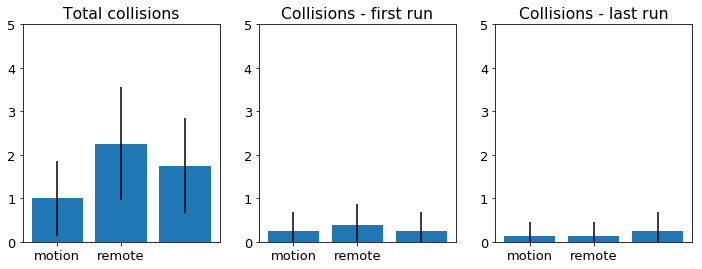

In [13]:
def compute_mean_std_collisions(data_m, data_r, data_g):
    
    coll_per_sub_m = []
    
    for sub in np.unique(data_m['Subject']):
        sub_coll = data_m[data_m['Subject']==sub]
        
        coll_per_sub_m.append(sub_coll['Collided'].sum())
        
    coll_per_sub_r = []
    
    for sub in np.unique(data_r['Subject']):
        sub_coll = data_r[data_r['Subject']==sub]
        
        coll_per_sub_r.append(sub_coll['Collided'].sum())
        
    coll_per_sub_g = []
    
    for sub in np.unique(data_g['Subject']):
        sub_coll = data_g[data_g['Subject']==sub]
        
        coll_per_sub_g.append(sub_coll['Collided'].sum())
    
    mean_m = np.mean(coll_per_sub_m)
    std_m = np.std(coll_per_sub_m)
    mean_r = np.mean(coll_per_sub_r)
    std_r = np.std(coll_per_sub_r)
    mean_g = np.mean(coll_per_sub_g)
    std_g = np.std(coll_per_sub_g)

    print('mean motion = ', mean_m)
    print('std motion = ', std_m)
    print('mean remote = ', mean_r)
    print('std remote = ', std_r)
    print('mean glove = ', mean_g)
    print('std glove = ', std_g)
    print('')
    print('total motion = ', np.sum(coll_per_sub_m))
    print('total remote = ', np.sum(coll_per_sub_r))
    print('total glove = ', np.sum(coll_per_sub_g))
    print('')

    t, p = t_test_kruskal(coll_per_sub_m, coll_per_sub_r)
    
    print('motion remote')
    
    print_p(p)

    t, p = t_test_kruskal(coll_per_sub_m, coll_per_sub_g)
    
    print('motion glove')
    
    print_p(p)

    t, p = t_test_kruskal(coll_per_sub_r, coll_per_sub_g)
    
    print('remote glove')
    
    print_p(p)
    
    return [coll_per_sub_m, coll_per_sub_r, coll_per_sub_g]

print('')
print('consider all runs')
print('')
all_m, all_r, all_g = compute_mean_std_collisions(coll['motion'], coll['remote'], coll['glove'])
    
print('')
print('consider first runs')
print('')
first_m, first_r, first_g = compute_mean_std_collisions(coll['first motion'], coll['first remote'], coll['first glove'])
    
print('')
print('consider last runs')
print('')
last_m, last_r, last_g = compute_mean_std_collisions(coll['last motion'], coll['last remote'], coll['last glove'])


    
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131)
ax.bar([0, 1, 2],
   [np.mean(all_m), np.mean(all_r), np.mean(all_g)],
      yerr = [np.std(all_m), np.std(all_r), np.std(all_g)])

plt.xticks(range(2), ['motion', 'remote', 'glove'])
plt.ylim([0, 5])
plt.title('Total collisions')

ax = fig.add_subplot(132)
ax.bar([0, 1, 2],
   [np.mean(first_m), np.mean(first_r), np.mean(first_g)],
      yerr = [np.std(first_m), np.std(first_r), np.std(first_g)])

plt.xticks(range(2), ['motion', 'remote', 'glove'])
plt.ylim([0, 5])
plt.title('Collisions - first run')

ax = fig.add_subplot(133)
ax.bar([0, 1, 2],
   [np.mean(last_m), np.mean(last_r), np.mean(last_g)],
      yerr = [np.std(last_m), np.std(last_r), np.std(last_g)])

plt.xticks(range(2), ['motion', 'remote', 'glove'])
plt.ylim([0, 5])
plt.title('Total collisions')
plt.title('Collisions - last run')

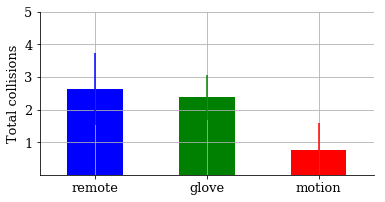

In [96]:

c1 = 'b'
c2 = 'g'
c3 = 'r'

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar([1],
   [np.mean(all_r),],
      yerr = [np.std(all_r)], color =c1, ecolor = c1, width=0.5 )
ax.bar([2],
   [np.mean(all_g)],
      yerr = [np.std(all_g)], color =c2, ecolor = c2, width=0.5 )
ax.bar([3],
   [np.mean(all_m)],
      yerr = [np.std(all_m)], color =c3, ecolor = c3, width=0.5 )

plt.xticks([1,2,3], ['remote', 'glove', 'motion'])
plt.yticks([1,2,3,4,5])
plt.ylim([0, 5])
plt.xlim([0.5, 3.5])
plt.ylabel('Total collisions')
plt.grid()
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

all_r_X = all_r
all_m_X = all_m
all_g_X = all_g

savefig('collisions_X.pdf', bbox_inches='tight')

## <span style="color:red">HERE RESULTS</span>

# Approach wall Analysis

In [15]:
def comp_max_dist(df):
    
    return np.max(df['dronePosition.x'])

In [16]:
x_max = runHapticsAnalysis(comp_max_dist)

motion
[2.122805595397949, 2.2166364192962646, 2.236614465713501, 2.292959451675415, 2.391254425048828, 2.122805595397949, 2.2166364192962646, 2.236614465713501, 2.292959451675415, 2.391254425048828, 2.4389536380767822, 2.220491409301758, 2.540416955947876, 2.226597547531128, 2.4883811473846436, 2.2479584217071533, 2.4243648052215576, 2.0713884830474854, 2.340548276901245, 2.4011707305908203, 2.2544796466827393, 2.2213897705078125, 2.440469741821289, 2.2062902450561523, 2.2559120655059814, 2.4174914360046387, 2.178957462310791, 2.117490768432617, 2.221266984939575, 2.1515555381774902, 2.4389536380767822, 2.220491409301758, 2.540416955947876, 2.226597547531128, 2.4883811473846436, 2.2479584217071533, 2.4243648052215576, 2.0713884830474854, 2.340548276901245, 2.4011707305908203]
mean =  2.2946596801280976
std =  0.12671801855762455

glove
[2.471513509750366, 2.318308115005493, 2.3503975868225098, 2.197399616241455, 2.3273816108703613, 2.471513509750366, 2.318308115005493, 2.3503975868225

In [17]:
dist_obstacle = 2.5
collider = 0.07

x_collision = dist_obstacle - collider


motion glove
p = 0.05238608901611083 !
motion remote
p = 0.02745363053122479 !!!!!!
glove remote
p = 0.5433872988098845


Text(0.5, 1.0, 'Distances')

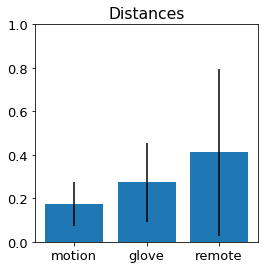

In [18]:
distances = {}

for i in interfaces:
    distances[i] = x_collision - np.array(x_max[i])
    distances[i] = distances[i][np.where(distances[i]>0)]
    
print()
            
for idx,i in enumerate(interfaces):
    for j in interfaces[idx+1:]:
        if i != j:

            t, p = t_test_kruskal(distances[i],distances[j])

            print (i,j)
            print_p(p)
        
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.bar([0, 1, 2],
   [np.mean(distances['motion']), np.mean(distances['glove']), np.mean(distances['remote'])],
      yerr = [np.std(distances['motion']), np.std(distances['glove']), np.std(distances['remote'])])

plt.xticks(range(3), ['motion', 'glove', 'remote'])
plt.ylim([0, 1])
plt.title('Distances')

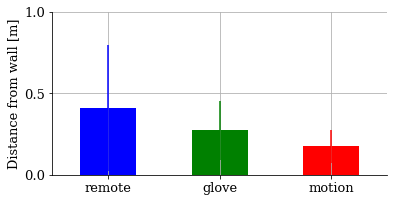

In [37]:
c1 = 'b'
c2 = 'g'
c3 = 'r'

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar([1],
   [np.mean(distances['remote']),],
      yerr = [np.std(distances['remote'])], color =c1, ecolor = c1, width=0.5 )
ax.bar([2],
   [np.mean(distances['glove'])],
      yerr = [np.std(distances['glove'])], color =c2, ecolor = c2, width=0.5 )
ax.bar([3],
   [np.mean(distances['motion'])],
      yerr = [np.std(distances['motion'])], color =c3, ecolor = c3, width=0.5 )

plt.xticks([1,2,3], ['remote', 'glove', 'motion'])
plt.yticks([0,0.5,1])
plt.ylim([0, 1])
plt.xlim([0.5, 3.5])
plt.ylabel('Distance from wall [m]')
plt.grid()
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

savefig('distances_X.pdf', bbox_inches='tight')

## <span style="color:red">HERE RESULTS</span>

In [65]:
%load_ext autoreload
%autoreload 2

import os,sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import numpy as np
import pandas as pd
import seaborn as sn
import json
import glob, os
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from numpy.random import seed
from scipy.stats import kruskal
from scipy.stats import levene

from termcolor import colored
import my_plots
from matplotlib.pylab import savefig

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
def dfFromJSON(file):
    with open(file) as f:
        temp = []
        for line in f:
            temp.append(json.loads(line))
            
    df = pd.io.json.json_normalize(temp[0]['allLogs'])
    df.columns = df.columns.map(lambda x: x.split("*.")[-1])
    return df

In [39]:
def appendToLogs(file, log, _type):
    df = dfFromJSON(file)
    log[_type].append(df)

In [40]:
path_to_folder = "../Haptics_new/Haptics_Z/"
subjects = glob.glob(path_to_folder + "*/")

logs = {}
for curr in subjects:
    logs[curr] = []
    
subjects.sort()

## Remove outliers

In [41]:
# # used to remove outliers

# subjects.remove(subjects[5])
# subjects.remove(subjects[4])

# logs = {}
# for curr in subjects:
#     logs[curr] = []
    
# subjects

# Import data

In [42]:
EXP_N_THOMAS = 4
EXP_N = 5

for subject in subjects:
#     print(subject)
    files = glob.glob(subject+"*.json")
    files.sort()
    
    if len(files) != EXP_N and len(files) != EXP_N_THOMAS:
        print(subject)
        print('wrong number of experiments!')
        break
    for file in files:
        print('.')
        logs[subject].append(dfFromJSON(file))

.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


In [45]:
fields = ['first motion', 'last motion', 'first glove', 'last glove', 'first remote', 'last remote']
interfaces = ['motion', 'glove', 'remote']

sub_remote = [x for x in subjects if 'Controller' in x]
sub_motion = [x for x in subjects if 'Glove_haptics' in x]
sub_glove = [x for x in subjects if 'Glove_nohaptics' in x]

t = [logs[x] for x in sub_motion]
logs['motion'] = []
for i in t:
    for j in i:
        logs['motion'].append(j)

t = [logs[x] for x in sub_remote]
logs['remote'] = []
for i in t:
    for j in i:
        logs['remote'].append(j)

t = [logs[x] for x in sub_glove]
logs['glove'] = []
for i in t:
    for j in i:
        logs['glove'].append(j)

logs['first motion'] = [logs[x][0] for x in sub_motion]
logs['last motion'] = [logs[x][-1] for x in sub_motion]
logs['first remote'] = [logs[x][0] for x in sub_remote]
logs['last remote'] = [logs[x][-1] for x in sub_remote]
logs['first glove'] = [logs[x][0] for x in sub_glove]
logs['last glove'] = [logs[x][-1] for x in sub_glove]

# Analysis scripts

In [46]:
def t_test_kruskal(X, Y):
    
    # Kruskal-Wallis H-test
    
    # seed the random number generator
    seed(1)
    
    # compare samples
    stat, p = kruskal(X, Y)
    
    return [stat, p]

def t_test_levene(X, Y):
    
    # Kruskal-Wallis H-test
    
    # seed the random number generator
    seed(1)
    
    # compare samples
    stat, p = levene(X, Y)
    
    return [stat, p]

def str_from_p(p):
    
    if p<0.01:
        add_str = ' !!!!!!!!!!'
    elif p<0.05:
        add_str = ' !!!!!!'
    elif p<0.1:
        add_str = ' !'
    else:
        add_str = ''
        
    return add_str

def print_p(p):
    
    col = None
    
    if p<0.01:
        col = 'green'
    elif p<0.05:
        col = 'yellow'
    elif p<0.1:
        col = 'red'
        
    if col is not None:
        print(colored('p = '+ str(p) + str_from_p(p), col))
    else:
        print('p = '+ str(p) + str_from_p(p))

def runBasicAnalysis(f):
    
    var = {}

    var['means'] = []
    var['stds'] = []

    for i in fields:
        var[i] = []
        for j in logs[i]:
            var[i].append(f(j))
        print(i)
        print(var[i])

        var['means'].append(np.mean(var[i]))
        var['stds'].append(np.std(var[i]))

        print('mean = ', var['means'][-1])
        print('std = ', var['stds'][-1])

        print()
        
            
    for idx,i in enumerate(fields):
        for j in fields[idx+1:]:
            if i != j:
                
                t, p = t_test_kruskal(var[i],var[j])
                
                print (i,j)
                print_p(p)
            
    var['diff mot'] = 1-np.array(var['last motion'])/np.array(var['first motion'])
    var['diff rem'] = 1-np.array(var['last remote'])/np.array(var['first remote'])

    print()
    print('motion ratio')
    print(var['diff mot'])
    print(np.mean(var['diff mot']))
    print(np.std(var['diff mot']))
    print()
    print('remote ratio')
    print(var['diff rem'])
    print(np.mean(var['diff rem']))
    print(np.std(var['diff rem']))

    t, p = t_test_kruskal(var['diff mot'], var['diff rem'])

    print()
    print('p = ', p, str_from_p(p))
            
    var['diff first'] = 1-np.array(var['first motion'])/np.array(var['first remote'])
    var['diff last'] = 1-np.array(var['last motion'])/np.array(var['last remote'])

    print()
    print('firts ratio')
    print(var['diff first'])
    print(np.mean(var['diff first']))
    print(np.std(var['diff first']))
    print()
    print('last ratio')
    print(var['diff last'])
    print(np.mean(var['diff last']))
    print(np.std(var['diff last']))

    t, p = t_test_kruskal(var['diff first'], var['diff last'])

    print()
    print('p = ', p, str_from_p(p))
            
    return var

def runHapticsXAnalysis(f):
    
    var = {}

    var['means'] = []
    var['stds'] = []

    for i in interfaces:
        var[i] = []
        for j in logs[i]:
            var[i].append(f(j))
        print(i)
        print(var[i])

        var['means'].append(np.mean(var[i]))
        var['stds'].append(np.std(var[i]))

        print('mean = ', var['means'][-1])
        print('std = ', var['stds'][-1])

        print()
        
            
    for idx,i in enumerate(interfaces):
        for j in interfaces[idx+1:]:
            if i != j:
                
                t, p = t_test_kruskal(var[i],var[j])
                print_p(p)
                
    return var

def runHapticsZAnalysis(f):
    
    varX = {}
    varY = {}

    varX['means'] = []
    varX['stds'] = []
    varY['means'] = []
    varY['stds'] = []

    for i in interfaces:
        varX[i] = []
        varY[i] = []
        for j in logs[i]:
            varX[i].append(f(j)[0])
            varY[i].append(f(j)[1])
        print(i)
        print(varX[i])
        print(varY[i])

        varX['means'].append(np.mean(varX[i]))
        varX['stds'].append(np.std(varX[i]))
        varY['means'].append(np.mean(varY[i]))
        varY['stds'].append(np.std(varY[i]))

        print('mean = ', varX['means'][-1])
        print('std = ', varX['stds'][-1])
        print('mean = ', varY['means'][-1])
        print('std = ', varY['stds'][-1])

        print()
        
            
    for idx,i in enumerate(interfaces):
        for j in interfaces[idx+1:]:
            if i != j:
                
                tX, pX = t_test_kruskal(varX[i],varX[j])
                tY, pY = t_test_kruskal(varY[i],varY[j])
                
                print('')
                print(i,j, ' X')
                print_p(pX)
                print('')
                print(i,j, ' Y')
                print_p(pY)
                
    return [varX, varY]

def basic_plot(var):
    
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(131)
    ax.bar([0, 1, 2, 3],
       var['means'],
       yerr=var['stds'])

    plt.xticks(range(4), fields, rotation = 10)

    ax = fig.add_subplot(132)
    ax.bar([0, 1],
       [np.mean(var['diff mot']), np.mean(var['diff rem'])],
       yerr=[np.std(var['diff mot']), np.std(var['diff rem'])])
    
    plt.xticks(range(2), ['motion', 'remote'], rotation = 10)

    ax = fig.add_subplot(133)
    ax.bar([0, 1],
       [np.mean(var['diff first']), np.mean(var['diff last'])],
       yerr=[np.std(var['diff first']), np.std(var['diff last'])])
    
    plt.xticks(range(2), ['first', 'last'], rotation = 10)

In [47]:
def moving_average(data_set, periods=3, fill_with_zeros = True):
    
    if data_set.size < periods:
        return data_set
    
    if isinstance(data_set, pd.DataFrame):
        print('a')
        data_set.index = range(len(data_set))

    weights = np.ones(periods) / periods
    
    ma = np.convolve(data_set, weights, mode='valid')

    if fill_with_zeros:
        fill_before = np.ones(int(np.ceil((len(data_set) - len(ma))/2))) * data_set[0]
        fill_after = np.ones(int(np.floor((len(data_set) - len(ma))/2))) * data_set[-1]
        ma = np.hstack([fill_before, ma, fill_after])
    
    return ma

def filter_position(df, steps):
    
    l = moving_average(df['dronePosition.x'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.x'] = np.append([l[0]]*(steps-1), l)
    l = moving_average(df['dronePosition.y'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.y'] = np.append([l[0]]*(steps-1), l)
    l = moving_average(df['dronePosition.x'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.x'] = np.append([l[0]]*(steps-1), l)
    return df

def running_average(signal, steps):
    
    l = moving_average(signal, periods=steps, fill_with_zeros = False)
    out = np.append([l[0]]*(steps-1), l)
    return out

# Collision Analysis

In [56]:
coll_df = pd.read_csv('../Haptics_new/Bidir - haptics ZY collisions - Sheet1.csv')

In [57]:
coll = {}

coll['motion'] = coll_df[coll_df['Interface']=='Motion']
coll['remote'] = coll_df[coll_df['Interface']=='Remote']
coll['glove'] = coll_df[coll_df['Interface']=='Glove']


coll['first motion'] = coll['motion'][coll['motion']['Run']==1]
coll['last motion'] = coll['motion'][coll['motion']['Run']==5]
coll['first remote'] = coll['remote'][coll['remote']['Run']==1]
coll['last remote'] = coll['remote'][coll['remote']['Run']==5]
coll['first glove'] = coll['glove'][coll['glove']['Run']==1]
coll['last glove'] = coll['glove'][coll['glove']['Run']==5]



consider all runs

mean motion =  1.0
std motion =  0.5
mean remote =  2.625
std remote =  0.4841229182759271
mean glove =  2.5
std glove =  0.8660254037844386

total motion =  8
total remote =  21
total glove =  20

motion remote
p = 0.0007567124312040807 !!!!!!!!!!
motion glove
p = 0.003299062241053698 !!!!!!!!!!
remote glove
p = 0.7286867560031555

consider first runs

mean motion =  0.375
std motion =  0.4841229182759271
mean remote =  0.375
std remote =  0.4841229182759271
mean glove =  0.5
std glove =  0.5

total motion =  3
total remote =  3
total glove =  4

motion remote
p = 1.0
motion glove
p = 0.6255852315243224
remote glove
p = 0.6255852315243224

consider last runs

mean motion =  0.0
std motion =  0.0
mean remote =  0.5
std remote =  0.5
mean glove =  0.625
std glove =  0.4841229182759271

total motion =  0
total remote =  4
total glove =  5

motion remote
p = 0.025347318677468145 !!!!!!
motion glove
p = 0.009023438818080298 !!!!!!!!!!
remote glove
p = 0.6255852315243224

Text(0.5, 1.0, 'Collisions - last run')

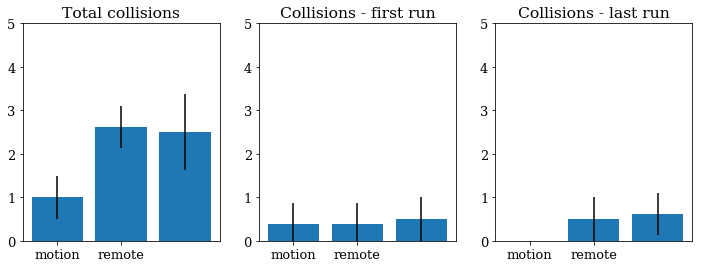

In [58]:
def compute_mean_std_collisions(data_m, data_r, data_g):
    
    coll_per_sub_m = []
    
    for sub in np.unique(data_m['Subject']):
        sub_coll = data_m[data_m['Subject']==sub]
        
        coll_per_sub_m.append(sub_coll['Collided Z'].sum())
        
    coll_per_sub_r = []
    
    for sub in np.unique(data_r['Subject']):
        sub_coll = data_r[data_r['Subject']==sub]
        
        coll_per_sub_r.append(sub_coll['Collided Z'].sum())
        
    coll_per_sub_g = []
    
    for sub in np.unique(data_g['Subject']):
        sub_coll = data_g[data_g['Subject']==sub]
        
        coll_per_sub_g.append(sub_coll['Collided Z'].sum())
    
    mean_m = np.mean(coll_per_sub_m)
    std_m = np.std(coll_per_sub_m)
    mean_r = np.mean(coll_per_sub_r)
    std_r = np.std(coll_per_sub_r)
    mean_g = np.mean(coll_per_sub_g)
    std_g = np.std(coll_per_sub_g)

    print('mean motion = ', mean_m)
    print('std motion = ', std_m)
    print('mean remote = ', mean_r)
    print('std remote = ', std_r)
    print('mean glove = ', mean_g)
    print('std glove = ', std_g)
    print('')
    print('total motion = ', np.sum(coll_per_sub_m))
    print('total remote = ', np.sum(coll_per_sub_r))
    print('total glove = ', np.sum(coll_per_sub_g))
    print('')

    t, p = t_test_kruskal(coll_per_sub_m, coll_per_sub_r)
    
    print('motion remote')
    
    print_p(p)

    t, p = t_test_kruskal(coll_per_sub_m, coll_per_sub_g)
    
    print('motion glove')
    
    print_p(p)

    t, p = t_test_kruskal(coll_per_sub_r, coll_per_sub_g)
    
    print('remote glove')
    
    print_p(p)
    
    return [coll_per_sub_m, coll_per_sub_r, coll_per_sub_g]

print('')
print('consider all runs')
print('')
all_m, all_r, all_g = compute_mean_std_collisions(coll['motion'], coll['remote'], coll['glove'])
    
print('')
print('consider first runs')
print('')
first_m, first_r, first_g = compute_mean_std_collisions(coll['first motion'], coll['first remote'], coll['first glove'])
    
print('')
print('consider last runs')
print('')
last_m, last_r, last_g = compute_mean_std_collisions(coll['last motion'], coll['last remote'], coll['last glove'])


    
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131)
ax.bar([0, 1, 2],
   [np.mean(all_m), np.mean(all_r), np.mean(all_g)],
      yerr = [np.std(all_m), np.std(all_r), np.std(all_g)])

plt.xticks(range(2), ['motion', 'remote', 'glove'])
plt.ylim([0, 5])
plt.title('Total collisions')

ax = fig.add_subplot(132)
ax.bar([0, 1, 2],
   [np.mean(first_m), np.mean(first_r), np.mean(first_g)],
      yerr = [np.std(first_m), np.std(first_r), np.std(first_g)])

plt.xticks(range(2), ['motion', 'remote', 'glove'])
plt.ylim([0, 5])
plt.title('Collisions - first run')

ax = fig.add_subplot(133)
ax.bar([0, 1, 2],
   [np.mean(last_m), np.mean(last_r), np.mean(last_g)],
      yerr = [np.std(last_m), np.std(last_r), np.std(last_g)])

plt.xticks(range(2), ['motion', 'remote', 'glove'])
plt.ylim([0, 5])
plt.title('Total collisions')
plt.title('Collisions - last run')

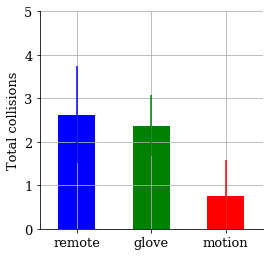

In [93]:
c1 = 'b'
c2 = 'g'
c3 = 'r'

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.bar([1],
   [np.mean(all_r),],
      yerr = [np.std(all_r)], color =c1, ecolor = c1, width=0.5 )
ax.bar([2],
   [np.mean(all_g)],
      yerr = [np.std(all_g)], color =c2, ecolor = c2, width=0.5 )
ax.bar([3],
   [np.mean(all_m)],
      yerr = [np.std(all_m)], color =c3, ecolor = c3, width=0.5 )

plt.xticks([1,2,3], ['remote', 'glove', 'motion'])
plt.ylim([0, 5])
plt.xlim([0.5, 3.5])
plt.ylabel('Total collisions')
plt.grid()

all_r_Z = all_r
all_m_Z = all_m
all_g_Z = all_g
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

savefig('collisions_Z.pdf', bbox_inches='tight')

# Go-through passing Analysis

In [62]:
def comp_max_dist(df):
    
    dist_obstacle = -1
    collider = 0.12

    z_cross = dist_obstacle + collider
    
    z = df['dronePosition.z']
    
    
#     print()
    for idx,i in enumerate(z):
        if idx>0:
            if z[idx-1]>z_cross and z[idx]<z_cross:
#                 print(idx)
                break
                
    
    return [df['dronePosition.x'][idx], df['dronePosition.y'][idx]]

cross_ret = runHapticsZAnalysis(comp_max_dist)

motion
[1.9807149171829224, 2.0670969486236572, 2.1436350345611572, 2.1720082759857178, 1.9889556169509888, 1.9904580116271973, 2.1401212215423584, 2.1797850131988525, 1.9791243076324463, 1.9286786317825317, 2.2403180599212646, 1.8802073001861572, 1.9193718433380127, 2.4656319618225098, 2.0969948768615723, 1.8686593770980835, 2.0027151107788086, 2.0819239616394043, 1.961200475692749, 2.017667055130005, 1.9268929958343506, 1.954237461090088, 1.7910175323486328, 1.9428610801696777, 2.0282511711120605, 2.023749828338623, 1.8965576887130737, 1.7850260734558105, 2.152784585952759, 1.9574851989746094, 2.112595558166504, 2.16152024269104, 2.1087892055511475, 2.0755133628845215, 2.02738356590271, 1.9479241371154785, 2.0851566791534424, 2.0599958896636963, 2.1921164989471436, 2.0059616565704346]
[1.0209239721298218, 0.9323489665985107, 1.1020268201828003, 0.9881572127342224, 1.0244355201721191, 0.9536042213439941, 0.8873814344406128, 0.9127938151359558, 0.9934953451156616, 0.9880255460739136, 0

In [63]:
coord = ['X', 'Y']
cross = {}
x_center = 2
y_center = 1

cross_dic = {'X':cross_ret[0], 'Y':cross_ret[1]}
center = {'X':2, 'Y':1}

for c in coord:
    cross[c] = {}
    for i in interfaces:
        cross[c][i] = np.array(cross_dic[c][i]) - center[c]

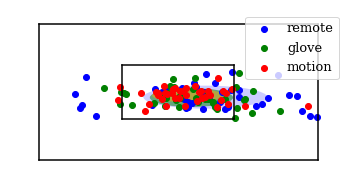

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(cross['X']['remote'], cross['Y']['remote'], color = 'b', label = 'remote')
ax.scatter(cross['X']['glove'], cross['Y']['glove'], color = 'g', label = 'glove')
ax.scatter(cross['X']['motion'], cross['Y']['motion'], color = 'r', label = 'motion')

l = 0.2
ax.plot([-l, -l], [-l, l] ,'k')
ax.plot([l, l], [-l, l] ,'k')
ax.plot([-l, l], [-l, -l] ,'k')
ax.plot([-l, l], [l, l] ,'k')
l = 0.5
ax.plot([-l, -l], [-l, l] ,'k')
ax.plot([l, l], [-l, l] ,'k')
ax.plot([-l, l], [-l, -l] ,'k')
ax.plot([-l, l], [l, l] ,'k')

plt.xlim([-0.6, 0.6])
plt.ylim([-0.6, 0.6])

plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])

plt.legend(loc = 'upper right')


ellipse = Ellipse((np.mean(cross['X']['remote']), np.mean(cross['Y']['remote'])), width=np.std(cross['X']['remote'])*2,
        height=np.std(cross['Y']['remote'])*2,
        alpha=0.2,
        facecolor='blue', zorder=-2)
ax.add_patch(ellipse)


ellipse = Ellipse((np.mean(cross['X']['glove']), np.mean(cross['Y']['glove'])), width=np.std(cross['X']['glove'])*2,
        height=np.std(cross['Y']['glove'])*2,
        alpha=0.5,
        facecolor='green', zorder=-1)
ax.add_patch(ellipse)


ellipse = Ellipse((np.mean(cross['X']['motion']), np.mean(cross['Y']['motion'])), width=np.std(cross['X']['motion'])*2,
        height=np.std(cross['Y']['motion'])*2,
        alpha=0.5,
        facecolor='orange', zorder=-0)
ax.add_patch(ellipse)

        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

cross_z = cross

savefig('cross_Z.pdf', bbox_inches='tight')

0.09764657616615295
0.22220854249340977
0.0477924108505249
0.14926031215926083
0.03352721035480499
0.12686590346692814

remote motion
p = 0.009923638558194274 !!!!!!!!!!
remote glove
p = 0.0973012685687053 !
glove motion
p = 0.18604813127574138

-0.039488191902637484
0.08462998198904778
-0.04244684129953384
0.06942286192764067
-0.026652222871780394
0.05144838874418088

remote motion
p = 0.003794603234619843 !!!!!!!!!!
remote glove
p = 0.12953328411071505
glove motion
p = 0.19170068721324723



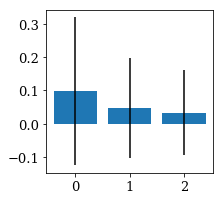

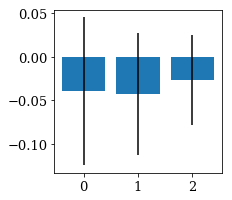

In [73]:
for c in coord:

    print(np.mean(cross[c]['remote']))
    print(np.std(cross[c]['remote']))
    print(np.mean(cross[c]['glove']))
    print(np.std(cross[c]['glove']))
    print(np.mean(cross[c]['motion']))
    print(np.std(cross[c]['motion']))

    fig = plt.figure(figsize=[3,3])
    ax = fig.add_subplot(111)

    ax.bar([0,1,2], 
            [np.mean(cross[c]['remote']), np.mean(cross[c]['glove']), np.mean(cross[c]['motion'])],
          yerr = [np.std(cross[c]['remote']), np.std(cross[c]['glove']), np.std(cross[c]['motion'])])

    print('')
    print('remote motion')
    print_p(t_test_levene(cross[c]['remote'], cross[c]['motion'])[1])
    print('remote glove')
    print_p(t_test_levene(cross[c]['remote'], cross[c]['glove'])[1])
    print('glove motion')
    print_p(t_test_levene(cross[c]['glove'], cross[c]['motion'])[1])
    print('')

# TEST

# Import data

In [74]:
path_to_folder = "../Haptics_new/Haptics_Y/"
subjects = glob.glob(path_to_folder + "*/")

logs = {}
for curr in subjects:
    logs[curr] = []
    
subjects.sort()

## Remove outliers

In [75]:
# # used to remove outliers

# subjects.remove(subjects[5])
# subjects.remove(subjects[4])

# logs = {}
# for curr in subjects:
#     logs[curr] = []
    
# subjects

In [76]:
EXP_N_THOMAS = 4
EXP_N = 5

for subject in subjects:
#     print(subject)
    files = glob.glob(subject+"*.json")
    files.sort()
    
    if len(files) != EXP_N and len(files) != EXP_N_THOMAS:
        print(subject)
        print('wrong number of experiments!')
        break
    for file in files:
        print('.')
        logs[subject].append(dfFromJSON(file))

.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


In [78]:
fields = ['first motion', 'last motion', 'first glove', 'last glove', 'first remote', 'last remote']
interfaces = ['motion', 'glove', 'remote']

sub_remote = [x for x in subjects if 'Controller' in x]
sub_motion = [x for x in subjects if 'Glove_haptics' in x]
sub_glove = [x for x in subjects if 'Glove_nohaptics' in x]

t = [logs[x] for x in sub_motion]
logs['motion'] = []
for i in t:
    for j in i:
        logs['motion'].append(j)

t = [logs[x] for x in sub_remote]
logs['remote'] = []
for i in t:
    for j in i:
        logs['remote'].append(j)

t = [logs[x] for x in sub_glove]
logs['glove'] = []
for i in t:
    for j in i:
        logs['glove'].append(j)

logs['first motion'] = [logs[x][0] for x in sub_motion]
logs['last motion'] = [logs[x][-1] for x in sub_motion]
logs['first remote'] = [logs[x][0] for x in sub_remote]
logs['last remote'] = [logs[x][-1] for x in sub_remote]
logs['first glove'] = [logs[x][0] for x in sub_glove]
logs['last glove'] = [logs[x][-1] for x in sub_glove]

# Analysis scripts

In [79]:
def t_test_kruskal(X, Y):
    
    # Kruskal-Wallis H-test
    
    # seed the random number generator
    seed(1)
    
    # compare samples
    stat, p = kruskal(X, Y)
    
    return [stat, p]

def t_test_levene(X, Y):
    
    # Kruskal-Wallis H-test
    
    # seed the random number generator
    seed(1)
    
    # compare samples
    stat, p = levene(X, Y)
    
    return [stat, p]

def str_from_p(p):
    
    if p<0.01:
        add_str = ' !!!!!!!!!!'
    elif p<0.05:
        add_str = ' !!!!!!'
    elif p<0.1:
        add_str = ' !'
    else:
        add_str = ''
        
    return add_str

def print_p(p):
    
    col = None
    
    if p<0.01:
        col = 'green'
    elif p<0.05:
        col = 'yellow'
    elif p<0.1:
        col = 'red'
        
    if col is not None:
        print(colored('p = '+ str(p) + str_from_p(p), col))
    else:
        print('p = '+ str(p) + str_from_p(p))

def runBasicAnalysis(f):
    
    var = {}

    var['means'] = []
    var['stds'] = []

    for i in fields:
        var[i] = []
        for j in logs[i]:
            var[i].append(f(j))
        print(i)
        print(var[i])

        var['means'].append(np.mean(var[i]))
        var['stds'].append(np.std(var[i]))

        print('mean = ', var['means'][-1])
        print('std = ', var['stds'][-1])

        print()
        
            
    for idx,i in enumerate(fields):
        for j in fields[idx+1:]:
            if i != j:
                
                t, p = t_test_kruskal(var[i],var[j])
                
                print (i,j)
                print_p(p)
            
    var['diff mot'] = 1-np.array(var['last motion'])/np.array(var['first motion'])
    var['diff rem'] = 1-np.array(var['last remote'])/np.array(var['first remote'])

    print()
    print('motion ratio')
    print(var['diff mot'])
    print(np.mean(var['diff mot']))
    print(np.std(var['diff mot']))
    print()
    print('remote ratio')
    print(var['diff rem'])
    print(np.mean(var['diff rem']))
    print(np.std(var['diff rem']))

    t, p = t_test_kruskal(var['diff mot'], var['diff rem'])

    print()
    print('p = ', p, str_from_p(p))
            
    var['diff first'] = 1-np.array(var['first motion'])/np.array(var['first remote'])
    var['diff last'] = 1-np.array(var['last motion'])/np.array(var['last remote'])

    print()
    print('firts ratio')
    print(var['diff first'])
    print(np.mean(var['diff first']))
    print(np.std(var['diff first']))
    print()
    print('last ratio')
    print(var['diff last'])
    print(np.mean(var['diff last']))
    print(np.std(var['diff last']))

    t, p = t_test_kruskal(var['diff first'], var['diff last'])

    print()
    print('p = ', p, str_from_p(p))
            
    return var

def runHapticsXAnalysis(f):
    
    var = {}

    var['means'] = []
    var['stds'] = []

    for i in interfaces:
        var[i] = []
        for j in logs[i]:
            var[i].append(f(j))
        print(i)
        print(var[i])

        var['means'].append(np.mean(var[i]))
        var['stds'].append(np.std(var[i]))

        print('mean = ', var['means'][-1])
        print('std = ', var['stds'][-1])

        print()
        
            
    for idx,i in enumerate(interfaces):
        for j in interfaces[idx+1:]:
            if i != j:
                
                t, p = t_test_kruskal(var[i],var[j])
                print_p(p)
                
    return var

def runHapticsYAnalysis(f):
    
    varX = {}
    varZ = {}

    varX['means'] = []
    varX['stds'] = []
    varZ['means'] = []
    varZ['stds'] = []

    for i in interfaces:
        varX[i] = []
        varZ[i] = []
        for j in logs[i]:
            varX[i].append(f(j)[0])
            varZ[i].append(f(j)[1])
        print(i)
        print(varX[i])
        print(varZ[i])

        varX['means'].append(np.mean(varX[i]))
        varX['stds'].append(np.std(varX[i]))
        varZ['means'].append(np.mean(varZ[i]))
        varZ['stds'].append(np.std(varZ[i]))

        print('mean = ', varX['means'][-1])
        print('std = ', varX['stds'][-1])
        print('mean = ', varZ['means'][-1])
        print('std = ', varZ['stds'][-1])

        print()
        
            
    for idx,i in enumerate(interfaces):
        for j in interfaces[idx+1:]:
            if i != j:
                
                tX, pX = t_test_kruskal(varX[i],varX[j])
                tY, pY = t_test_kruskal(varZ[i],varZ[j])
                
                print('')
                print(i,j, ' X')
                print_p(pX)
                print('')
                print(i,j, ' Y')
                print_p(pY)
                
    return [varX, varZ]

def basic_plot(var):
    
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(131)
    ax.bar([0, 1, 2, 3],
       var['means'],
       yerr=var['stds'])

    plt.xticks(range(4), fields, rotation = 10)

    ax = fig.add_subplot(132)
    ax.bar([0, 1],
       [np.mean(var['diff mot']), np.mean(var['diff rem'])],
       yerr=[np.std(var['diff mot']), np.std(var['diff rem'])])
    
    plt.xticks(range(2), ['motion', 'remote'], rotation = 10)

    ax = fig.add_subplot(133)
    ax.bar([0, 1],
       [np.mean(var['diff first']), np.mean(var['diff last'])],
       yerr=[np.std(var['diff first']), np.std(var['diff last'])])
    
    plt.xticks(range(2), ['first', 'last'], rotation = 10)

In [80]:
def moving_average(data_set, periods=3, fill_with_zeros = True):
    
    if data_set.size < periods:
        return data_set
    
    if isinstance(data_set, pd.DataFrame):
        print('a')
        data_set.index = range(len(data_set))

    weights = np.ones(periods) / periods
    
    ma = np.convolve(data_set, weights, mode='valid')

    if fill_with_zeros:
        fill_before = np.ones(int(np.ceil((len(data_set) - len(ma))/2))) * data_set[0]
        fill_after = np.ones(int(np.floor((len(data_set) - len(ma))/2))) * data_set[-1]
        ma = np.hstack([fill_before, ma, fill_after])
    
    return ma

def filter_position(df, steps):
    
    l = moving_average(df['dronePosition.x'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.x'] = np.append([l[0]]*(steps-1), l)
    l = moving_average(df['dronePosition.y'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.y'] = np.append([l[0]]*(steps-1), l)
    l = moving_average(df['dronePosition.x'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.x'] = np.append([l[0]]*(steps-1), l)
    return df

def running_average(signal, steps):
    
    l = moving_average(signal, periods=steps, fill_with_zeros = False)
    out = np.append([l[0]]*(steps-1), l)
    return out

# Collision Analysis

In [81]:
coll_df = pd.read_csv('../Haptics_new/Bidir - haptics ZY collisions - Sheet1.csv')

In [82]:
coll = {}

coll['motion'] = coll_df[coll_df['Interface']=='Motion']
coll['remote'] = coll_df[coll_df['Interface']=='Remote']
coll['glove'] = coll_df[coll_df['Interface']=='Glove']


coll['first motion'] = coll['motion'][coll['motion']['Run']==1]
coll['last motion'] = coll['motion'][coll['motion']['Run']==5]
coll['first remote'] = coll['remote'][coll['remote']['Run']==1]
coll['last remote'] = coll['remote'][coll['remote']['Run']==5]
coll['first glove'] = coll['glove'][coll['glove']['Run']==1]
coll['last glove'] = coll['glove'][coll['glove']['Run']==5]



consider all runs

mean motion =  0.75
std motion =  0.82915619758885
mean remote =  2.625
std remote =  1.1110243021644486
mean glove =  2.375
std glove =  0.6959705453537527

total motion =  6
total remote =  21
total glove =  19

motion remote
p = 0.004951148295674912 !!!!!!!!!!
motion glove
p = 0.0047514344772291925 !!!!!!!!!!
remote glove
p = 0.821297105776074

consider first runs

mean motion =  0.125
std motion =  0.33071891388307384
mean remote =  0.625
std remote =  0.4841229182759271
mean glove =  0.25
std glove =  0.4330127018922193

total motion =  1
total remote =  5
total glove =  2

motion remote
p = 0.04550026389635837 !!!!!!
motion glove
p = 0.5351434523977472
remote glove
p = 0.1432349075246649

consider last runs

mean motion =  0.0
std motion =  0.0
mean remote =  0.25
std remote =  0.4330127018922193
mean glove =  0.25
std glove =  0.4330127018922193

total motion =  0
total remote =  2
total glove =  2

motion remote
p = 0.14323490752466425
motion glove
p = 0.143

Text(0.5, 1.0, 'Collisions - last run')

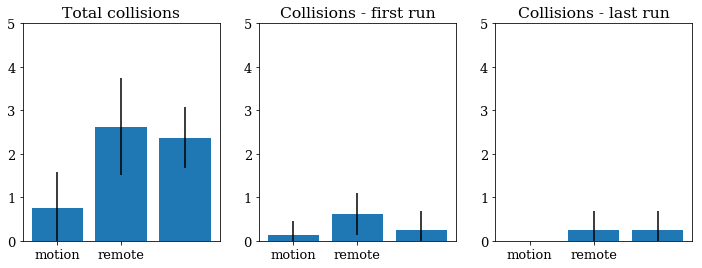

In [84]:
def compute_mean_std_collisions(data_m, data_r, data_g):
    
    coll_per_sub_m = []
    
    for sub in np.unique(data_m['Subject']):
        sub_coll = data_m[data_m['Subject']==sub]
        
        coll_per_sub_m.append(sub_coll['Collided Y'].sum())
        
    coll_per_sub_r = []
    
    for sub in np.unique(data_r['Subject']):
        sub_coll = data_r[data_r['Subject']==sub]
        
        coll_per_sub_r.append(sub_coll['Collided Y'].sum())
        
    coll_per_sub_g = []
    
    for sub in np.unique(data_g['Subject']):
        sub_coll = data_g[data_g['Subject']==sub]
        
        coll_per_sub_g.append(sub_coll['Collided Y'].sum())
    
    mean_m = np.mean(coll_per_sub_m)
    std_m = np.std(coll_per_sub_m)
    mean_r = np.mean(coll_per_sub_r)
    std_r = np.std(coll_per_sub_r)
    mean_g = np.mean(coll_per_sub_g)
    std_g = np.std(coll_per_sub_g)

    print('mean motion = ', mean_m)
    print('std motion = ', std_m)
    print('mean remote = ', mean_r)
    print('std remote = ', std_r)
    print('mean glove = ', mean_g)
    print('std glove = ', std_g)
    print('')
    print('total motion = ', np.sum(coll_per_sub_m))
    print('total remote = ', np.sum(coll_per_sub_r))
    print('total glove = ', np.sum(coll_per_sub_g))
    print('')

    t, p = t_test_kruskal(coll_per_sub_m, coll_per_sub_r)
    
    print('motion remote')
    
    print_p(p)

    t, p = t_test_kruskal(coll_per_sub_m, coll_per_sub_g)
    
    print('motion glove')
    
    print_p(p)

    t, p = t_test_kruskal(coll_per_sub_r, coll_per_sub_g)
    
    print('remote glove')
    
    print_p(p)
    
    return [coll_per_sub_m, coll_per_sub_r, coll_per_sub_g]

print('')
print('consider all runs')
print('')
all_m, all_r, all_g = compute_mean_std_collisions(coll['motion'], coll['remote'], coll['glove'])
    
print('')
print('consider first runs')
print('')
first_m, first_r, first_g = compute_mean_std_collisions(coll['first motion'], coll['first remote'], coll['first glove'])
    
print('')
print('consider last runs')
print('')
last_m, last_r, last_g = compute_mean_std_collisions(coll['last motion'], coll['last remote'], coll['last glove'])


    
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131)
ax.bar([0, 1, 2],
   [np.mean(all_m), np.mean(all_r), np.mean(all_g)],
      yerr = [np.std(all_m), np.std(all_r), np.std(all_g)])

plt.xticks(range(2), ['motion', 'remote', 'glove'])
plt.ylim([0, 5])
plt.title('Total collisions')

ax = fig.add_subplot(132)
ax.bar([0, 1, 2],
   [np.mean(first_m), np.mean(first_r), np.mean(first_g)],
      yerr = [np.std(first_m), np.std(first_r), np.std(first_g)])

plt.xticks(range(2), ['motion', 'remote', 'glove'])
plt.ylim([0, 5])
plt.title('Collisions - first run')

ax = fig.add_subplot(133)
ax.bar([0, 1, 2],
   [np.mean(last_m), np.mean(last_r), np.mean(last_g)],
      yerr = [np.std(last_m), np.std(last_r), np.std(last_g)])

plt.xticks(range(2), ['motion', 'remote', 'glove'])
plt.ylim([0, 5])
plt.title('Total collisions')
plt.title('Collisions - last run')

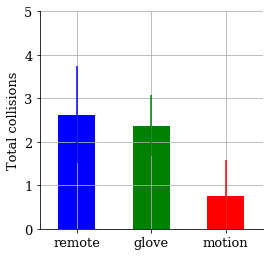

In [86]:
c1 = 'b'
c2 = 'g'
c3 = 'r'

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.bar([1],
   [np.mean(all_r),],
      yerr = [np.std(all_r)], color =c1, ecolor = c1, width=0.5 )
ax.bar([2],
   [np.mean(all_g)],
      yerr = [np.std(all_g)], color =c2, ecolor = c2, width=0.5 )
ax.bar([3],
   [np.mean(all_m)],
      yerr = [np.std(all_m)], color =c3, ecolor = c3, width=0.5 )

plt.xticks([1,2,3], ['remote', 'glove', 'motion'])
plt.ylim([0, 5])
plt.xlim([0.5, 3.5])
plt.ylabel('Total collisions')
plt.grid()

all_r_Y = all_r
all_m_Y = all_m
all_g_Y = all_g
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

savefig('collisions_Y.pdf', bbox_inches='tight')

## <span style="color:red">HERE RESULTS</span>

# Go-through passing Analysis

In [87]:
def comp_max_dist(df):
    
    dist_obstacle = 2
    collider = 0.5+0.5

    y_cross = dist_obstacle + collider
    
    y = df['dronePosition.y']
    
    
#     print()
    for idx,i in enumerate(y):
        if idx>0:
            if y[idx-1]>y_cross and y[idx]<y_cross:
#                 print(idx)
                break
                
    
    return [df['dronePosition.x'][idx], df['dronePosition.z'][idx]]

cross_ret = runHapticsYAnalysis(comp_max_dist)

motion
[1.624389410018921, 1.6687146425247192, 1.5290614366531372, 1.7451717853546143, 1.7518776655197144, 1.56535804271698, 1.7678158283233643, 2.0582897663116455, 2.132568359375, 1.6028823852539062, 1.014326810836792, 1.3641598224639893, 1.600997805595398, 1.874525547027588, 1.246256947517395, 1.9096323251724243, 1.9094460010528564, 1.7496224641799927, 1.855517029762268, 1.8179845809936523, 2.1066086292266846, 1.8555128574371338, 1.501312255859375, 1.812190294265747, 2.0701797008514404, 1.8110320568084717, 1.9291640520095825, 1.7242236137390137, 1.7601706981658936, 1.494538426399231, 1.4446359872817993, 1.8739532232284546, 1.8739985227584839, 1.964161992073059, 2.071294069290161, 1.8840299844741821, 1.9207932949066162, 1.9492642879486084, 1.8576877117156982, 1.810193657875061]
[0.007495112717151642, -0.004759358707815409, 0.0038157599046826363, 0.019410505890846252, 0.02120937779545784, 0.014410099014639854, -0.03574386611580849, -0.07397458702325821, 0.05142384022474289, -0.05559293

In [88]:
coord = ['X', 'Z']
cross = {}

cross_dic = {'X':cross_ret[0], 'Z':cross_ret[1]}
center = {'X':1.85, 'Z':0}

for c in coord:
    cross[c] = {}
    for i in interfaces:
        cross[c][i] = np.array(cross_dic[c][i]) - center[c]

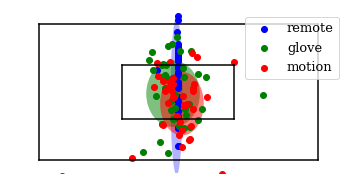

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111)


ax.scatter(cross['Z']['remote'], cross['X']['remote'], color = 'b', label = 'remote')
ax.scatter(cross['Z']['glove'], cross['X']['glove'], color = 'g', label = 'glove')
ax.scatter(cross['Z']['motion'], cross['X']['motion'], color = 'r', label = 'motion')

l = 0.2
ax.plot([-l, -l], [-l, l] ,'k')
ax.plot([l, l], [-l, l] ,'k')
ax.plot([-l, l], [-l, -l] ,'k')
ax.plot([-l, l], [l, l] ,'k')
l = 0.5
ax.plot([-l, -l], [-l, l] ,'k')
ax.plot([l, l], [-l, l] ,'k')
ax.plot([-l, l], [-l, -l] ,'k')
ax.plot([-l, l], [l, l] ,'k')

plt.xlim([-0.6, 0.6])
plt.ylim([-0.6, 0.6])

plt.xlabel('Z [m]')
plt.ylabel('X [m]')

plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])

plt.legend(loc = 'upper right')

ellipse = Ellipse((np.mean(cross['Z']['remote']), np.mean(cross['X']['remote'])), width=np.std(cross['Z']['remote'])*2,
        height=np.std(cross['X']['remote'])*2,
        alpha=0.3,
        facecolor='b', zorder=-2)
ax.add_patch(ellipse)


ellipse = Ellipse((np.mean(cross['Z']['glove']), np.mean(cross['X']['glove'])), width=np.std(cross['Z']['glove'])*2,
        height=np.std(cross['X']['glove'])*2,
        alpha=0.5,
        facecolor='g', zorder=-1)
ax.add_patch(ellipse)


ellipse = Ellipse((np.mean(cross['Z']['motion']), np.mean(cross['X']['motion'])), width=np.std(cross['Z']['motion'])*2,
        height=np.std(cross['X']['motion'])*2,
        alpha=0.5,
        facecolor='r', zorder=-1)
ax.add_patch(ellipse)
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

cross_y = cross

savefig('cross_Y.pdf', bbox_inches='tight')

-0.03234312087297449
0.5801078793057052
-0.014554744958877652
0.24453367265541442
-0.08741140067577371
0.23420521985467352

remote motion
p = 0.040642935526964144 !!!!!!
remote glove
p = 0.0902893232606561 !
glove motion
p = 0.32597009241827946

-0.005508593712572463
0.021817554460611177
-0.01819721228675917
0.09598980307183859
0.013783872465137393
0.07811714590783939

remote motion
p = 3.6997935076718695e-06 !!!!!!!!!!
remote glove
p = 5.920802205576634e-05 !!!!!!!!!!
glove motion
p = 0.7303182888925412



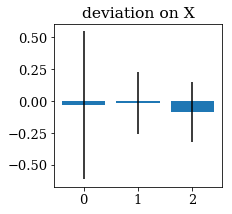

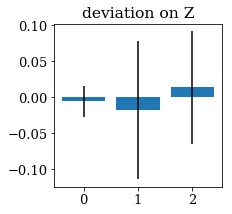

In [92]:
for c in coord:

    print(np.mean(cross[c]['remote']))
    print(np.std(cross[c]['remote']))
    print(np.mean(cross[c]['glove']))
    print(np.std(cross[c]['glove']))
    print(np.mean(cross[c]['motion']))
    print(np.std(cross[c]['motion']))

    fig = plt.figure(figsize=[3,3])
    ax = fig.add_subplot(111)

    ax.bar([0,1,2], 
            [np.mean(cross[c]['remote']), np.mean(cross[c]['glove']), np.mean(cross[c]['motion'])],
          yerr = [np.std(cross[c]['remote']), np.std(cross[c]['glove']), np.std(cross[c]['motion'])])

    plt.title('deviation on ' + c)
    
    print('')
    print('remote motion')
    print_p(t_test_levene(cross[c]['remote'], cross[c]['motion'])[1])
    print('remote glove')
    print_p(t_test_levene(cross[c]['remote'], cross[c]['glove'])[1])
    print('glove motion')
    print_p(t_test_levene(cross[c]['glove'], cross[c]['motion'])[1])
    print('')

# FINAL PLOTS

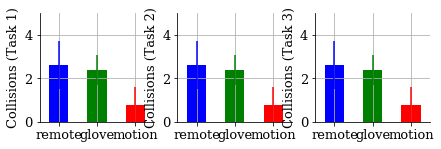

In [98]:
c1 = 'b'
c2 = 'g'
c3 = 'r'

fig = plt.figure(figsize=(7, 2))
ax = fig.add_subplot(131)
ax.bar([1],
   [np.mean(all_r_X),],
      yerr = [np.std(all_r_X)], color =c1, ecolor = c1, width=0.5 )
ax.bar([2],
   [np.mean(all_g_X)],
      yerr = [np.std(all_g_X)], color =c2, ecolor = c2, width=0.5 )
ax.bar([3],
   [np.mean(all_m_X)],
      yerr = [np.std(all_m_X)], color =c3, ecolor = c3, width=0.5 )

plt.xticks([1,2,3], ['remote', 'glove', 'motion'])
plt.ylim([0, 5])
plt.xlim([0.5, 3.5])
plt.ylabel('Collisions (Task 1)')
plt.grid()

        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = fig.add_subplot(132)
ax.bar([1],
   [np.mean(all_r_Z),],
      yerr = [np.std(all_r_Z)], color =c1, ecolor = c1, width=0.5 )
ax.bar([2],
   [np.mean(all_g_Z)],
      yerr = [np.std(all_g_Z)], color =c2, ecolor = c2, width=0.5 )
ax.bar([3],
   [np.mean(all_m_Z)],
      yerr = [np.std(all_m_Z)], color =c3, ecolor = c3, width=0.5 )

plt.xticks([1,2,3], ['remote', 'glove', 'motion'])

plt.ylim([0, 5])
plt.xlim([0.5, 3.5])
plt.ylabel('Collisions (Task 2)')
plt.grid()
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax = fig.add_subplot(133)
ax.bar([1],
   [np.mean(all_r_Y),],
      yerr = [np.std(all_r_Y)], color =c1, ecolor = c1, width=0.5 )
ax.bar([2],
   [np.mean(all_g_Y)],
      yerr = [np.std(all_g_Y)], color =c2, ecolor = c2, width=0.5 )
ax.bar([3],
   [np.mean(all_m_Y)],
      yerr = [np.std(all_m_Y)], color =c3, ecolor = c3, width=0.5 )

plt.xticks([1,2,3], ['remote', 'glove', 'motion'])

plt.ylim([0, 5])
plt.xlim([0.5, 3.5])
plt.ylabel('Collisions (Task 3)')
plt.grid()
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

savefig('collisions.pdf', bbox_inches='tight')

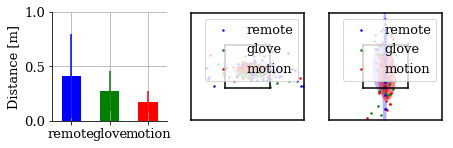

In [105]:
c1 = 'b'
c2 = 'g'
c3 = 'r'

fig = plt.figure(figsize = [7,2])
ax = fig.add_subplot(131)
ax.bar([1],
   [np.mean(distances['remote']),],
      yerr = [np.std(distances['remote'])], color =c1, ecolor = c1, width=0.5 )
ax.bar([2],
   [np.mean(distances['glove'])],
      yerr = [np.std(distances['glove'])], color =c2, ecolor = c2, width=0.5 )
ax.bar([3],
   [np.mean(distances['motion'])],
      yerr = [np.std(distances['motion'])], color =c3, ecolor = c3, width=0.5 )

plt.xticks([1,2,3], ['remote', 'glove', 'motion'])
plt.yticks([0,0.5,1])
plt.ylim([0, 1])
plt.xlim([0.5, 3.5])
plt.ylabel('Distance [m]')
plt.grid()
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

###

ax = fig.add_subplot(132)

size = 2

ax.scatter(cross_z['X']['remote'], cross_z['Y']['remote'], s = size, color = 'b', label = 'remote')
ax.scatter(cross_z['X']['glove'], cross_z['Y']['glove'], s = size, color = 'g', label = 'glove')
ax.scatter(cross_z['X']['motion'], cross_z['Y']['motion'], s = size, color = 'r', label = 'motion')


l = 0.2
ax.plot([-l, -l], [-l, l] ,'k')
ax.plot([l, l], [-l, l] ,'k')
ax.plot([-l, l], [-l, -l] ,'k')
ax.plot([-l, l], [l, l] ,'k')
l = 0.5
ax.plot([-l, -l], [-l, l] ,'k')
ax.plot([l, l], [-l, l] ,'k')
ax.plot([-l, l], [-l, -l] ,'k')
ax.plot([-l, l], [l, l] ,'k')

plt.xlim([-0.51, 0.51])
plt.ylim([-0.51, 0.51])

plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])

plt.legend(loc = 'upper right')


ellipse = Ellipse((np.mean(cross_z['X']['remote']), np.mean(cross_z['Y']['remote'])), width=np.std(cross_z['X']['remote'])*2,
        height=np.std(cross_z['Y']['remote'])*2,
        alpha=0.2,
        facecolor='blue', zorder=-2)
ax.add_patch(ellipse)


ellipse = Ellipse((np.mean(cross_z['X']['glove']), np.mean(cross_z['Y']['glove'])), width=np.std(cross_z['X']['glove'])*2,
        height=np.std(cross_z['Y']['glove'])*2,
        alpha=0.5,
        facecolor='green', zorder=-1)
ax.add_patch(ellipse)


ellipse = Ellipse((np.mean(cross_z['X']['motion']), np.mean(cross_z['Y']['motion'])), width=np.std(cross_z['X']['motion'])*2,
        height=np.std(cross_z['Y']['motion'])*2,
        alpha=0.5,
        facecolor='red', zorder=-0)
ax.add_patch(ellipse)
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

###

ax = fig.add_subplot(133)


ax.scatter(cross_y['Z']['remote'], cross_y['X']['remote'], s = size, color = 'b', label = 'remote')
ax.scatter(cross_y['Z']['glove'], cross_y['X']['glove'], s = size, color = 'g', label = 'glove')
ax.scatter(cross_y['Z']['motion'], cross_y['X']['motion'], s = size, color = 'r', label = 'motion')


l = 0.2
ax.plot([-l, -l], [-l, l] ,'k')
ax.plot([l, l], [-l, l] ,'k')
ax.plot([-l, l], [-l, -l] ,'k')
ax.plot([-l, l], [l, l] ,'k')
l = 0.5
ax.plot([-l, -l], [-l, l] ,'k')
ax.plot([l, l], [-l, l] ,'k')
ax.plot([-l, l], [-l, -l] ,'k')
ax.plot([-l, l], [l, l] ,'k')

plt.xlim([-0.51, 0.51])
plt.ylim([-0.51, 0.51])

plt.xlabel('Z [m]')
plt.ylabel('X [m]')

plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])

plt.legend(loc = 'upper right')

ellipse = Ellipse((np.mean(cross_y['Z']['remote']), np.mean(cross_y['X']['remote'])), width=np.std(cross_y['Z']['remote'])*2,
        height=np.std(cross_y['X']['remote'])*2,
        alpha=0.3,
        facecolor='b', zorder=-2)
ax.add_patch(ellipse)

ellipse = Ellipse((np.mean(cross_y['Z']['glove']), np.mean(cross_y['X']['glove'])), width=np.std(cross_y['Z']['glove'])*2,
        height=np.std(cross_y['X']['glove'])*2,
        alpha=0.3,
        facecolor='b', zorder=-1)
ax.add_patch(ellipse)


ellipse = Ellipse((np.mean(cross_y['Z']['motion']), np.mean(cross_y['X']['motion'])), width=np.std(cross['Z']['motion'])*2,
        height=np.std(cross_y['X']['motion'])*2,
        alpha=0.5,
        facecolor='r', zorder=-0)
ax.add_patch(ellipse)
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

savefig('cross.pdf', bbox_inches='tight')